# 1.电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等
## 1.1定义受欢迎程度的度量
由数据属性描述可知各游戏数据已按总销量排序，故每个游戏所在的顺位是受欢迎程度的重要参照。  
我们定义受欢迎程度为总销售额，该值越大表示游戏越受欢迎。  
随后我们对各游戏、类型、平台、发行人统计score的和作为该取值的受欢迎程度。  
因为数据集时间跨度较大，因此选择10年为一个单位可视化各种类型、平台等的受欢迎程度。
使用饼图可视化各类型、平台等的市场份额。

In [21]:
from math import *
import matplotlib.pyplot as plt

In [86]:
csv = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
#df =csv.dropna()
df = csv


In [87]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


首先由rank和Global_Sales属性就可知Wii sports和超级马里奥等游戏最受欢迎。

In [84]:
def get_rankscore(attr,year_s,year_e):
    rankscore = {}
    cnt = 0
    for i,at in enumerate(df[attr]):
        #print(i)
        if isnan(df['Global_Sales'][i]) or df['Year'][i]>=year_e or df['Year'][i]<year_s:
            continue
        cnt += 1
        if at not in rankscore.keys():
            rankscore[at] = df['Global_Sales'][i]
            continue
        rankscore[at] = rankscore[at] + df['Global_Sales'][i]
    keys = list(rankscore.keys())
    vals = [rankscore[i] for i in keys]
    plt.pie(vals,labels=keys, autopct='%1.1f%%')
    plt.title(f'year {year_s} to {year_e} market share of different {attr}s', fontsize=25)
    
    
    

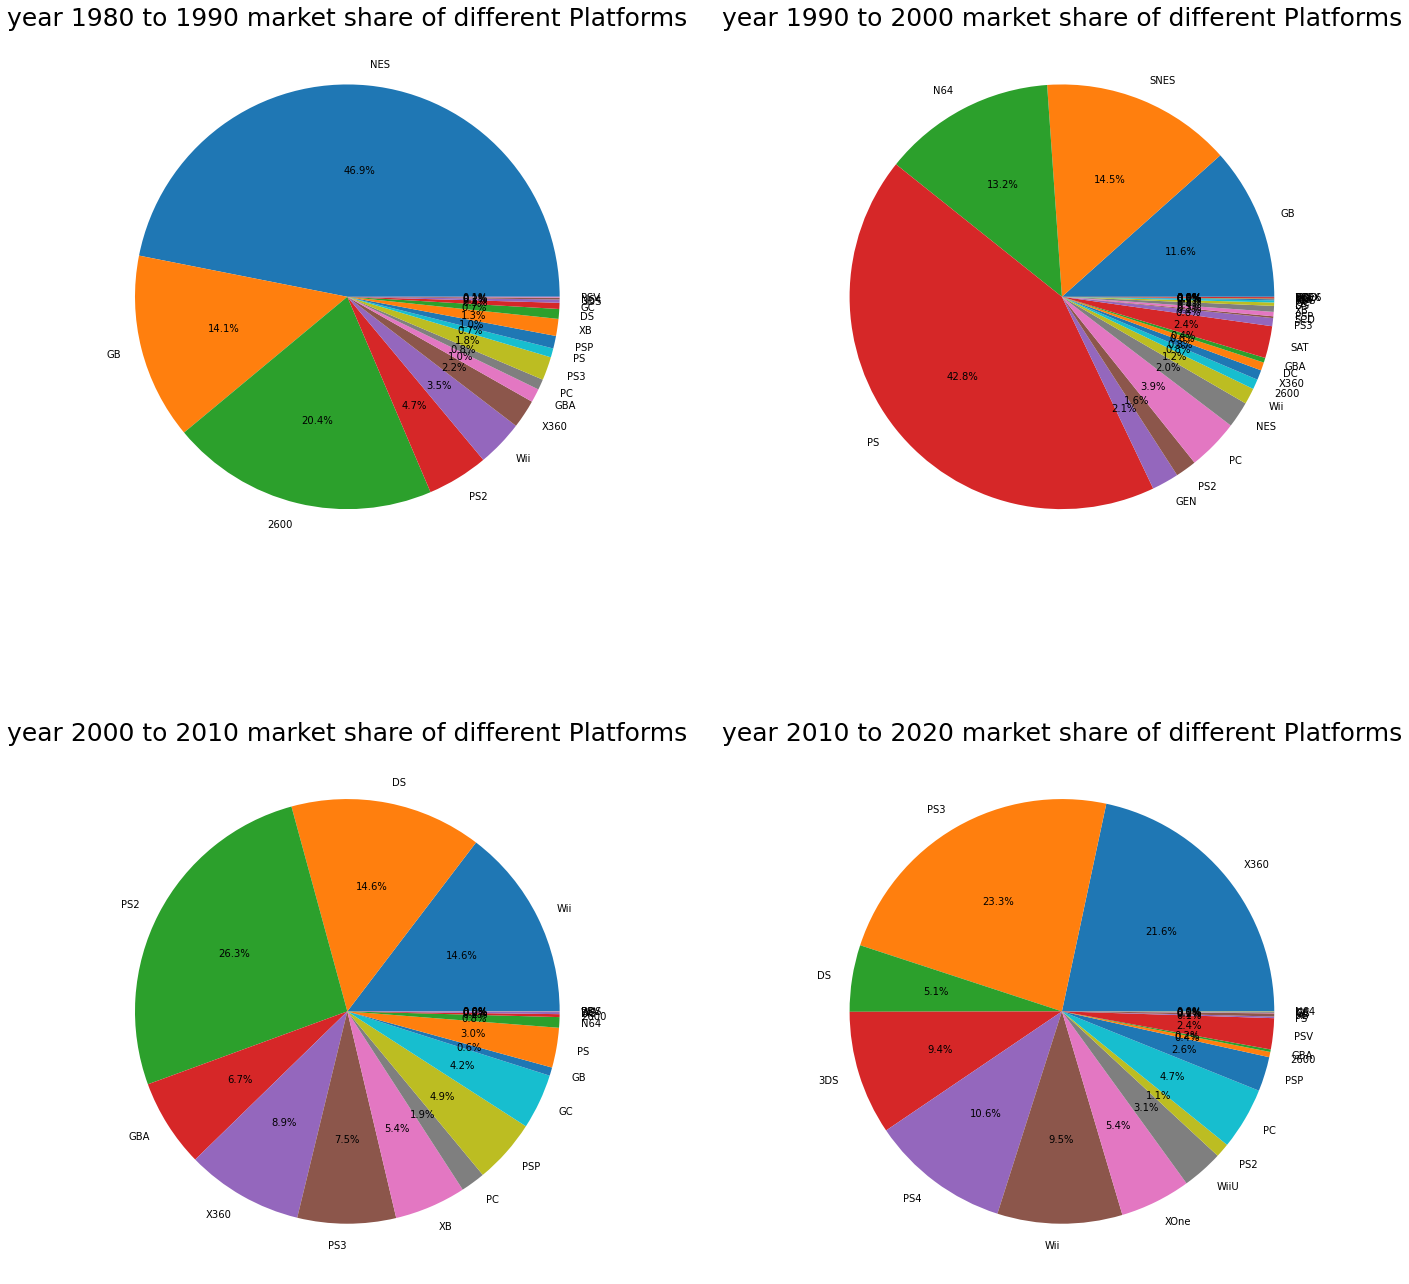

In [85]:
plt.figure(figsize=(20,20))
plt.subplot(221)
get_rankscore('Platform',1980,1990)
plt.subplot(222)
get_rankscore('Platform',1990,2000)
plt.subplot(223)
get_rankscore('Platform',2000,2010)
plt.subplot(224)
get_rankscore('Platform',2010,2020)
plt.tight_layout()

对于Platform属性，上图以十年为跨度可视化了不同platform的市场占有率，可以看到80到70年代NES最受欢迎，而90到00年代PS最受欢迎，00到10年代市场竞争更加激烈以PS2、DS和Wii为主，10到20年代以PS3和X360为主。

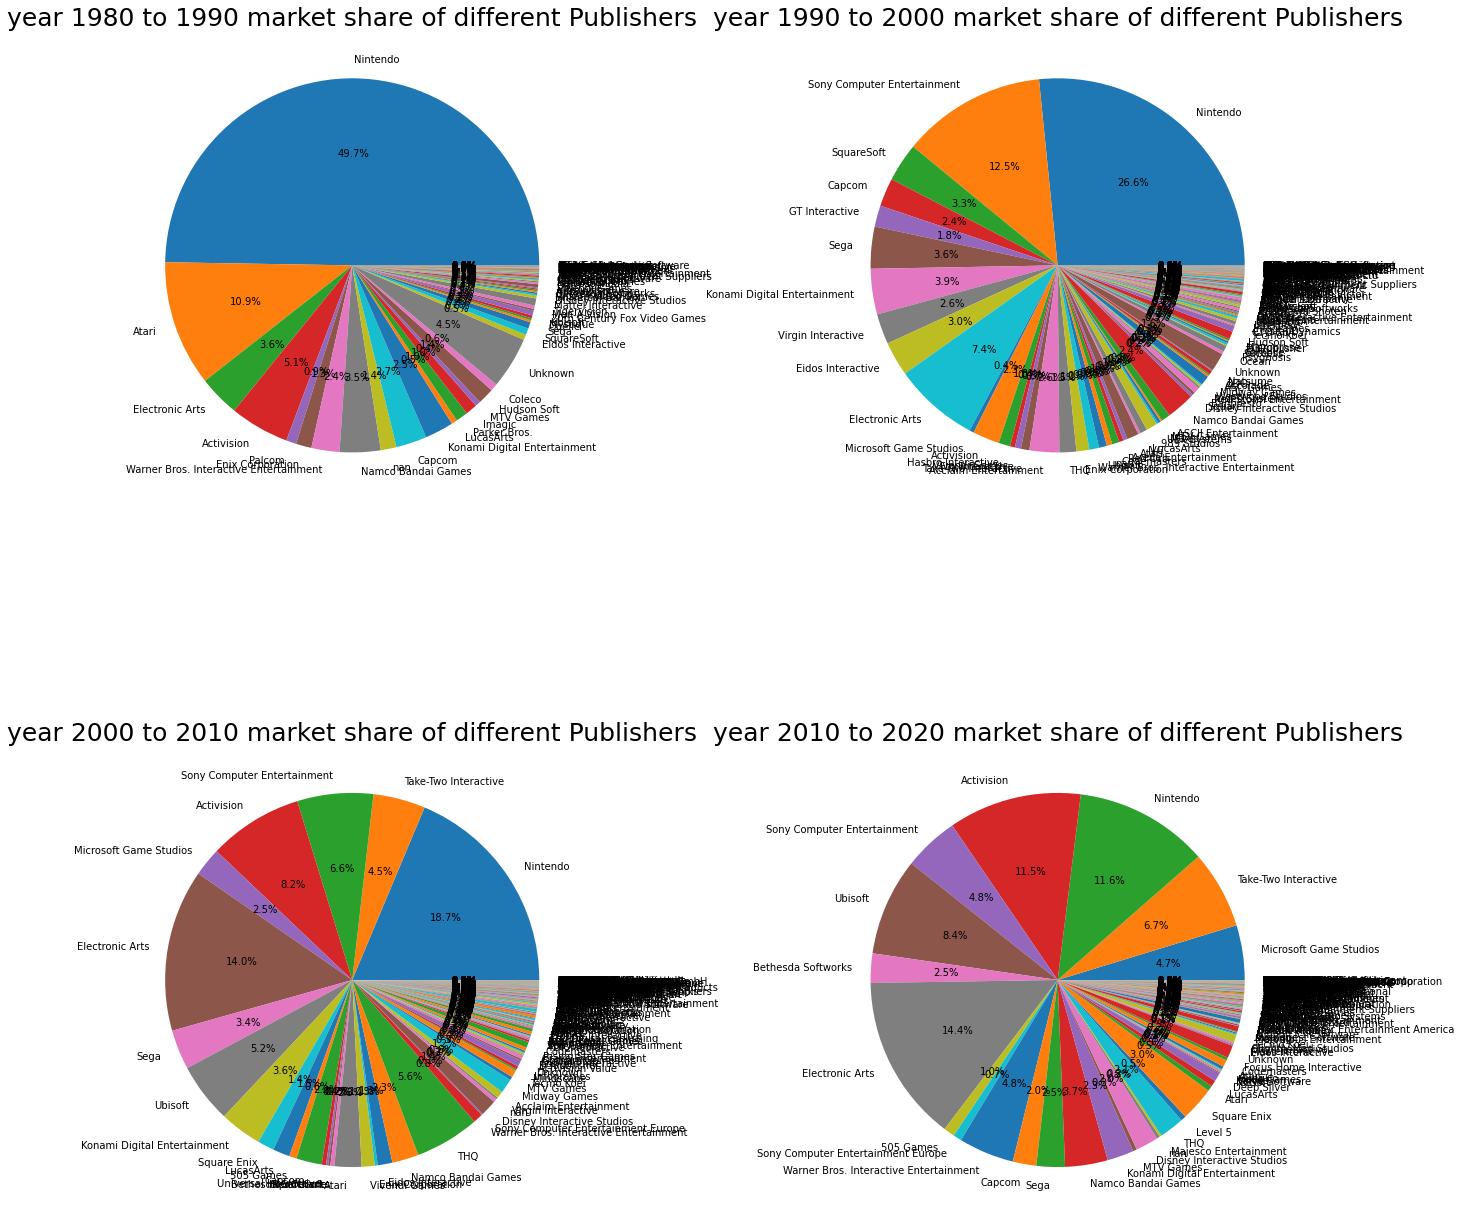

In [88]:
plt.figure(figsize=(20,20))
plt.subplot(221)
get_rankscore('Publisher',1980,1990)
plt.subplot(222)
get_rankscore('Publisher',1990,2000)
plt.subplot(223)
get_rankscore('Publisher',2000,2010)
plt.subplot(224)
get_rankscore('Publisher',2010,2020)
plt.tight_layout()

对于Publisher属性，上图以十年为跨度可视化了不同Publisher的市场占有率，可以看到80到70年代任天堂一骑绝尘最受欢迎占据近50%的份额，而90到00年代索尼崛起任天堂不再强势，00到10年代EA（棕色）和更多游戏公司崛起，10到20年代任天堂持续被挤压，动视、EA、任天堂和育碧索尼占据过半份额。

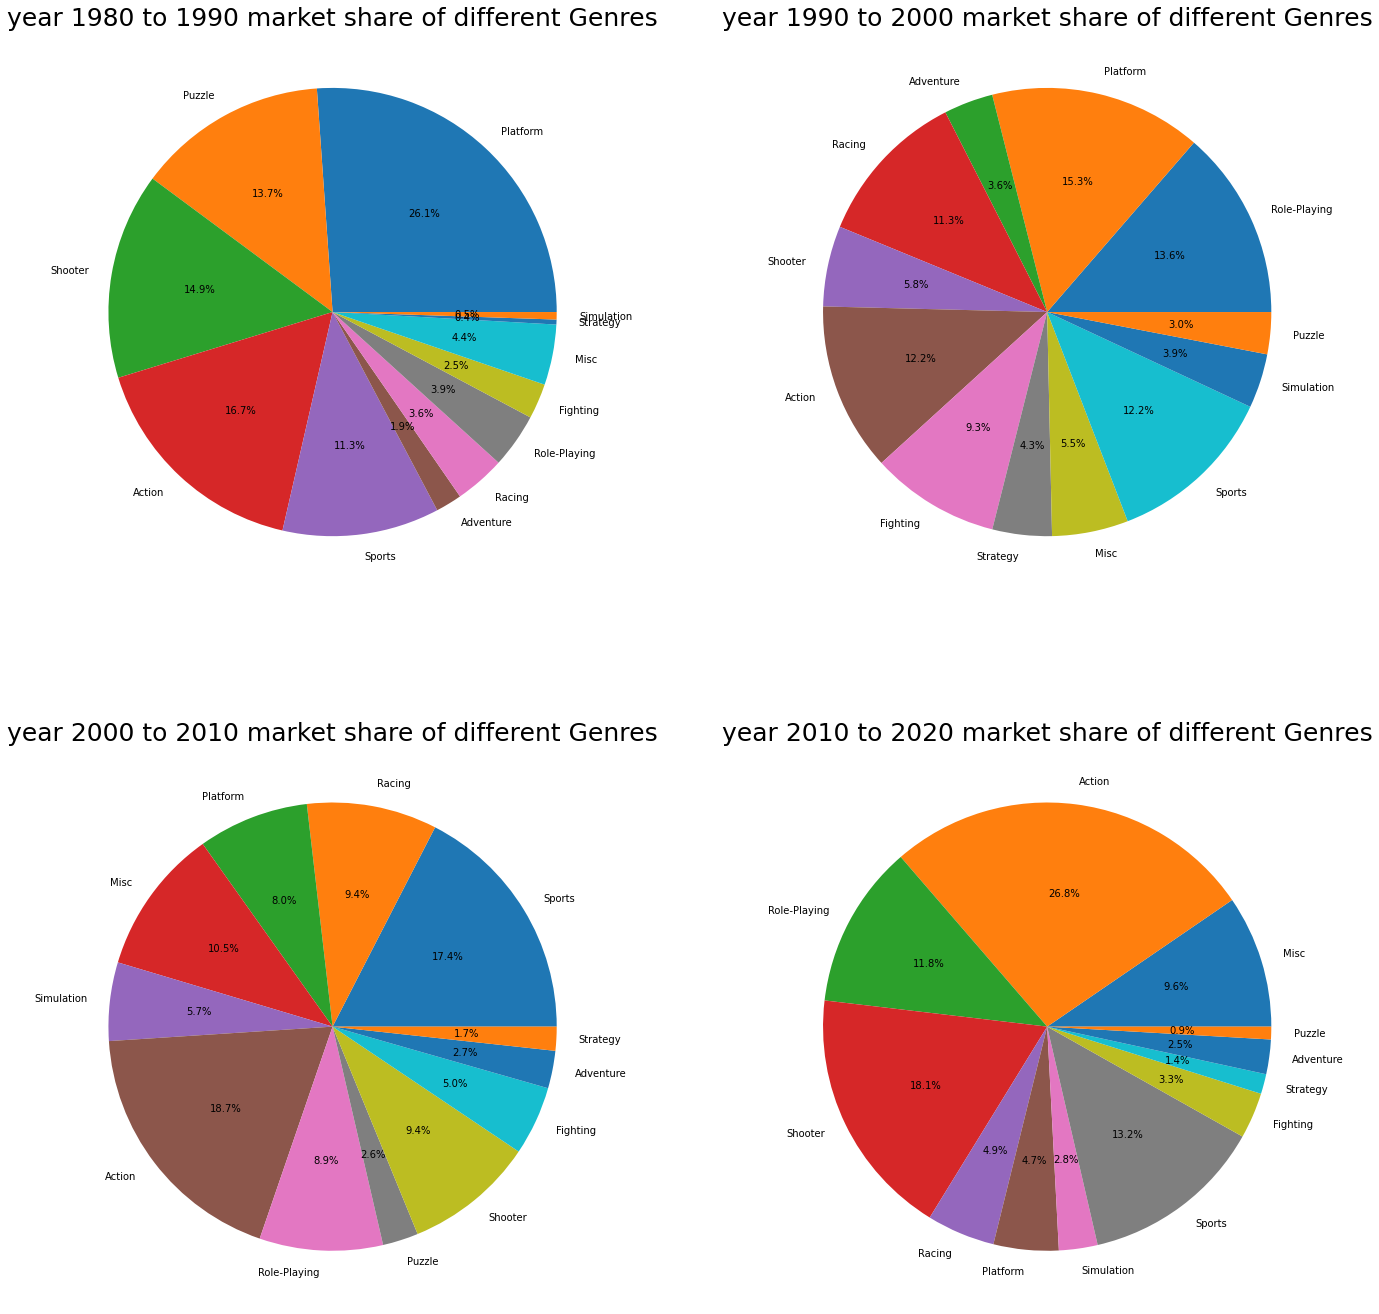

In [89]:
plt.figure(figsize=(20,20))
plt.subplot(221)
get_rankscore('Genre',1980,1990)
plt.subplot(222)
get_rankscore('Genre',1990,2000)
plt.subplot(223)
get_rankscore('Genre',2000,2010)
plt.subplot(224)
get_rankscore('Genre',2010,2020)
plt.tight_layout()

对于Genre属性，上图以十年为跨度可视化了不同Genre的市场占有率，可以看到80到90年代消费者喜爱平台和动作游戏，而90到00年代角色扮演类游戏崛起，00到10年代动作体育竞技游戏占据半壁江山，10到20年代射击游戏异军突起和动作、运动游戏一起占据过半份额。

# 2.预测每年电子游戏销售额

## 2.1尝试从数据分布中获得一些先验知识
由下图发现每年所发行的游戏的总销量关于年份的关系呈现出明显随年份增加逐渐振荡下降的关系。分析如下：  
下降的趋势是合理的，因为发行年份越近，游戏越新，游戏在售时间也越短，因此销量也应当更少。而剧烈震荡的原因可能和每年发行出的游戏质量水平具有一定随机性影响消费者购买积极性且经济环境也会影响游戏的销售。


In [23]:
#获得每年发行游戏的销量
sales = {}
for i,year in enumerate(df['Year']):
    #print(i)
    if isnan(year) or isnan(df['Global_Sales'][i]):
        continue           
    if year not in sales.keys():
        sales[year] = df['Global_Sales'][i]
        continue
    sales[year] = sales[year] + df['Global_Sales'][i]

可视化每年所发行的游戏的总销量关于年份的曲线图。

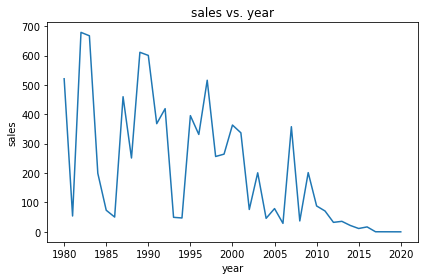

In [215]:
keys = list(sales.keys())
keys = sorted(keys)
vals = [sales[i] for i in sales.keys()]

plt.plot(keys, vals)
#plt.plot(keys, result)
plt.title('sales vs. year')
plt.xlabel('year')
plt.ylabel('sales')
plt.tight_layout()

## 2.2构建预测模型
由2.1中的发现，使用在预测年之前若干年(10年)内的发行的游戏的销售信息作为预测模型的输入。预测在某一年的发行的游戏的销售数据。  
模型上选择一个三层的一维卷积神经网络抽取时序特征并使用一个全连层做出预测。
以前20年数据为训练集，后20年数据为验证集。

In [208]:
import torch
import torch.nn as nn
class predictor(nn.Module):
    def __init__(self):
        super(predictor, self).__init__()
        self.a=2
        self.relu = nn.ReLU()
        self.l1 = nn.Conv1d(1,2*self.a,3)
        self.bn1=nn.BatchNorm1d(2*self.a)
        self.l2 = nn.Conv1d(2*self.a,4*self.a,3)
        self.bn2=nn.BatchNorm1d(4*self.a)
        self.l3 = nn.Conv1d(4*self.a,8*self.a,3)
        self.bn3=nn.BatchNorm1d(8*self.a)
        self.fc = nn.Linear(8*self.a,1)
        self.pool = nn.AdaptiveAvgPool1d(1)
    def forward(self,x):
        x = self.l1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.pool(x).squeeze(-1)
        #print(self.fc)
        x = self.fc(x)
        
        return x

In [212]:
import torch.optim as optim
import numpy as np
from tqdm import tqdm
batch_size=16
max_its = int(1e+5)
kernel_size=3
model = predictor()
lr = 0.001
optimizer = optim.SGD(model.parameters(), lr=lr)
if len(vals)==39:
    #padding
    vals = [vals[0]]*9 + vals
for it in tqdm(range(max_its)):
    
    choices = np.random.choice(range(len(vals)-9-20), batch_size)
    data = [np.array(vals[i:i+10]) for i in choices]
    target = [vals[i+9] for i in choices]
    data = np.stack(data, axis=0)
    data = torch.tensor(data)
    target = torch.tensor(target)
    data = data.unsqueeze(1)
    #print(data.size())
    #break
    pred = model(data.float())
    loss = pred - target
    loss = loss **2 
    loss = loss.mean()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if it%3000==0:
        print(it, loss.item())
    if it%3000==0:
        torch.save(model.state_dict(), f'{it}.pth')
    
    
    #break
    
    

  0%|          | 24/100000 [00:00<16:53, 98.62it/s]

0 165907.80454160433


  3%|▎         | 3016/100000 [00:18<08:52, 182.09it/s]

3000 40251.078803681914


  6%|▌         | 6023/100000 [00:39<11:45, 133.14it/s]

6000 52089.88720858057


  9%|▉         | 9017/100000 [01:00<11:10, 135.68it/s]

9000 51450.37138940334


 12%|█▏        | 12024/100000 [01:19<07:42, 190.13it/s]

12000 38878.94773478032


 15%|█▌        | 15028/100000 [01:39<08:59, 157.64it/s]

15000 67697.17857527708


 18%|█▊        | 18028/100000 [01:59<10:11, 134.15it/s]

18000 42312.21732491696


 21%|██        | 21015/100000 [02:19<09:42, 135.53it/s]

21000 39749.15395238367


 24%|██▍       | 24024/100000 [02:39<06:59, 181.18it/s]

24000 51383.37205356411


 27%|██▋       | 27014/100000 [03:00<09:29, 128.05it/s]

27000 51281.35053656609


 30%|███       | 30022/100000 [03:20<06:42, 173.69it/s]

30000 29989.09142644266


 33%|███▎      | 33020/100000 [03:40<07:57, 140.30it/s]

33000 43491.883133141935


 36%|███▌      | 36016/100000 [04:00<07:45, 137.33it/s]

36000 36280.875458461844


 39%|███▉      | 39025/100000 [04:20<05:16, 192.68it/s]

39000 43851.39406624401


 42%|████▏     | 42023/100000 [04:38<05:06, 188.92it/s]

42000 37686.14862000773


 45%|████▌     | 45014/100000 [04:58<06:52, 133.31it/s]

45000 67093.39643592763


 48%|████▊     | 48022/100000 [05:19<06:11, 140.00it/s]

48000 38664.69333258512


 51%|█████     | 51024/100000 [05:40<05:58, 136.76it/s]

51000 82060.7863877923


 54%|█████▍    | 54018/100000 [06:02<06:15, 122.30it/s]

54000 39793.76361099496


 57%|█████▋    | 57024/100000 [06:23<05:01, 142.66it/s]

57000 53169.11815259502


 60%|██████    | 60024/100000 [06:44<04:48, 138.44it/s]

60000 54785.20781709386


 63%|██████▎   | 63021/100000 [07:06<04:37, 133.35it/s]

63000 43189.57611644225


 64%|██████▎   | 63524/100000 [07:09<04:06, 147.81it/s]


KeyboardInterrupt: 

使用训练好的模型推理验证集（00到20年）

In [213]:
result = []
data = [np.array(vals[i:i+10]) for i in range(len(vals)-9)]
data = np.stack(data, axis=0)
data = torch.tensor(data)
data = data.unsqueeze(1)
#print(data.size())
result=model(data.float())
result = [i[0] for i in result]

作图展示拟合情况

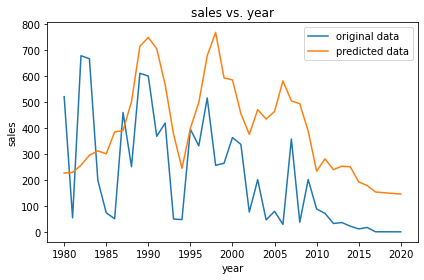

In [218]:
keys = list(sales.keys())
keys = sorted(keys)
vals = [sales[i] for i in sales.keys()]

plt.plot(keys, vals)
plt.plot(keys, result)
plt.title('sales vs. year')
plt.xlabel('year')
plt.ylabel('sales')
plt.legend(['original data', 'predicted data'])
plt.tight_layout()

可以看到在验证集上（2000年至2020年）模型泛化效果差强人意，在没有训练过后20年数据的情况下基本拟合出了趋势，但仍由一定差距。原因可能是因为数据过少和网络层数较浅神经元感受野较小等。

# 3.可视化应用：完整清晰地展示这个销售故事
纵观游戏业界的市场发展，动作和射击游戏市场份额在近几年取得了重大的突破，这是因为这两类游戏受计算机技术进步的红利品质提升最大，获得了消费者的青睐。在游戏平台方面，PS3平台的增长趋势明显。故建议在PS3平台上开发上述两种游戏。

In [205]:
if len(vals)==39:
    #padding
    vals = [vals[0]]*9 + vals